 # Robinhood Portfolio Analysis, Using Modern Portfolio Theory (MPT)
 
Modern portfolio theory (MPT) is a theory on how risk-averse investors can construct portfolios to optimize or maximize expected return based on a given level of market risk, emphasizing that risk is an inherent part of higher reward. According to the theory, it's possible to construct an "efficient frontier" of optimal portfolios offering the maximum possible expected return for a given level of risk.

MPT shows that an investor can construct a portfolio of multiple assets that will maximize returns for a given level of risk. Likewise, given a desired level of expected return, an investor can construct a portfolio with the lowest possible risk. Based on statistical measures such as variance and correlation, an individual investment's return is less important than how the investment behaves in the context of the entire portfolio.

##### Stocks mentioned in this portfolio should not be taken as a recommendation to buy or sell any security. This portfolio was created for perspective research only using Financial Engineering strategies for portfolio management and optimization. Taking the data and making a story

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

pd.options.display.float_format = '{:.2f}'.format

In [2]:
Robin_Stocks = pd.read_csv("Robin_Stocks.csv", header = [0,1], index_col = [0], parse_dates = [0])["Adj Close"]

In [3]:
Robin_Stocks = Robin_Stocks.loc["2020-3-23":"2020-5-29"]

In [4]:
Robin_Stocks.tail().dropna()

,AAL,BAC,CSCO,DAL,KO,MSFT
Date,,,,,,
2020-05-21,9.89,22.90,44.64,23.16,45.17,183.43
2020-05-22,9.70,22.66,44.90,22.69,45.03,183.51
2020-05-26,11.14,24.28,44.84,25.65,46.09,181.57
2020-05-27,11.98,25.98,45.96,26.32,46.73,181.81
2020-05-28,10.98,24.86,45.60,25.66,47.09,181.40


In [5]:
def ann_risk_return(returns_df):
    summary = returns_df.agg(["mean", "std"]).T
    summary.columns = ["Return", "Risk"]
    summary.Return = summary.Return*252
    summary.Risk = summary.Risk * np.sqrt(252)
    return summary

Daily Returns since the impact of COVID-19:

In [7]:
ret = Robin_Stocks.pct_change().dropna()

In [8]:
ret.tail().dropna()

,AAL,BAC,CSCO,DAL,KO,MSFT
Date,,,,,,
2020-05-21,0.00,-0.00,-0.02,0.02,-0.02,-0.01
2020-05-22,-0.02,-0.01,0.01,-0.02,-0.00,0.00
2020-05-26,0.15,0.07,-0.00,0.13,0.02,-0.01
2020-05-27,0.08,0.07,0.02,0.03,0.01,0.00
2020-05-28,-0.08,-0.04,-0.01,-0.03,0.01,-0.00


Risk and Return due to the impact of COVID-19:

In [9]:
summary = ann_risk_return(ret)
summary

,Return,Risk
AAL,1.28,1.40
BAC,2.03,0.77
CSCO,1.69,0.50
DAL,1.36,1.10
KO,1.34,0.45
MSFT,1.70,0.46


Risk/Return Analysis: the stock in the his portoflio with the highest risk include AAL and the stock with the highest return is BAC. A question we should always be asking ourselves when entering a new position, "is the risk worth the potential reward?". 

Plot Risk and Returns:

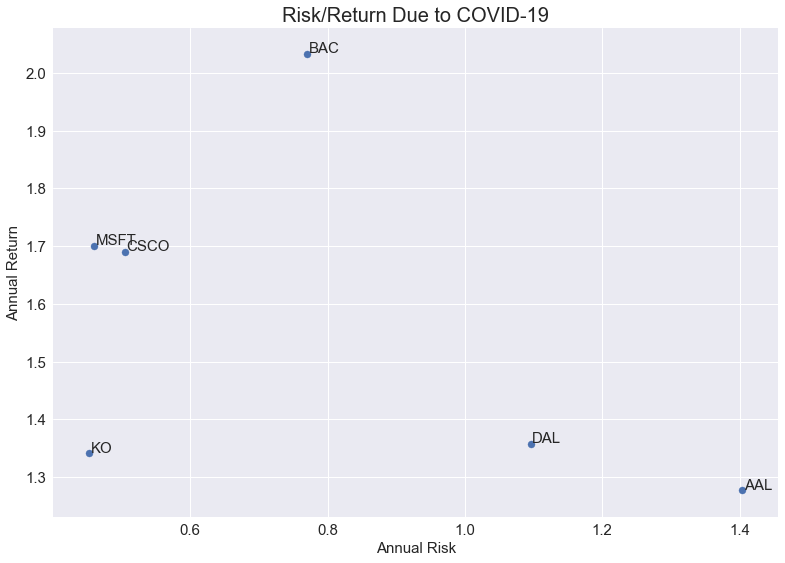

In [10]:
summary.plot(kind = "scatter", x = "Risk", y = "Return", figsize = (13,9), s = 50, fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "Risk"]+0.002, summary.loc[i, "Return"]+0.002), size = 15)
plt.xlabel("Annual Risk", fontsize = 15)
plt.ylabel("Annual Return", fontsize = 15)
plt.title("Risk/Return Due to COVID-19", fontsize = 20)
plt.show()

Number of assets in the portfolio (6), and 200,000 simulations of portfolios:

In [11]:
noa = len(Robin_Stocks.columns)
nop = 200000
print(noa, nop)

6 200000


Creating simulation:

In [12]:
np.random.seed(123)
matrix = np.random.random(noa * nop).reshape(nop, noa)

200,000 different weight combinations for each stock in the portfolio:

In [13]:
weights = matrix / matrix.sum(axis = 1, keepdims= True)
weights

array([[0.23988467, 0.09855488, 0.07813438, 0.18988917, 0.24780647,
        0.14573043],
       [0.27161429, 0.18965776, 0.13319   , 0.10859361, 0.09504023,
        0.20190411],
       [0.22014101, 0.02995528, 0.19979801, 0.37043624, 0.09160159,
        0.08806788],
       ...,
       [0.18797767, 0.40010447, 0.04277659, 0.02406148, 0.30980279,
        0.035277  ],
       [0.11427334, 0.38413301, 0.2375676 , 0.00199747, 0.23669224,
        0.02533634],
       [0.1197707 , 0.1219969 , 0.21134334, 0.21750883, 0.08111247,
        0.24826776]])

In [14]:
weights.sum(axis = 1, keepdims= True)

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

Daily Returns of 200,000 portfolios:

In [15]:
port_ret = ret.dot(weights.T)

In [16]:
port_ret.tail().dropna()

,0,1,2,3,4,5,6,7,8,9,...,199990,199991,199992,199993,199994,199995,199996,199997,199998,199999
Date,,,,,,,,,,,,,,,,,,,,,
2020-05-21,-0.00,-0.00,0.00,-0.00,-0.01,-0.00,-0.01,-0.01,-0.00,-0.00,...,-0.01,-0.01,-0.00,-0.00,-0.00,-0.00,-0.01,-0.01,-0.01,-0.00
2020-05-22,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.00,-0.01,-0.01,...,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01
2020-05-26,0.07,0.07,0.08,0.06,0.06,0.05,0.06,0.03,0.07,0.06,...,0.06,0.07,0.07,0.06,0.06,0.07,0.05,0.07,0.05,0.05
2020-05-27,0.04,0.04,0.03,0.03,0.04,0.03,0.04,0.03,0.04,0.03,...,0.04,0.04,0.04,0.03,0.03,0.04,0.04,0.05,0.04,0.03
2020-05-28,-0.03,-0.03,-0.03,-0.02,-0.03,-0.02,-0.03,-0.02,-0.03,-0.02,...,-0.03,-0.03,-0.03,-0.02,-0.02,-0.03,-0.03,-0.03,-0.03,-0.02


Annual Risk and Return of 200,000 Portfolios

In [17]:
port_summary = ann_risk_return(port_ret)

In [18]:
port_summary.tail().dropna()

,Return,Risk
199995,1.62,0.70
199996,1.52,0.63
199997,1.63,0.68
199998,1.69,0.61
199999,1.58,0.63


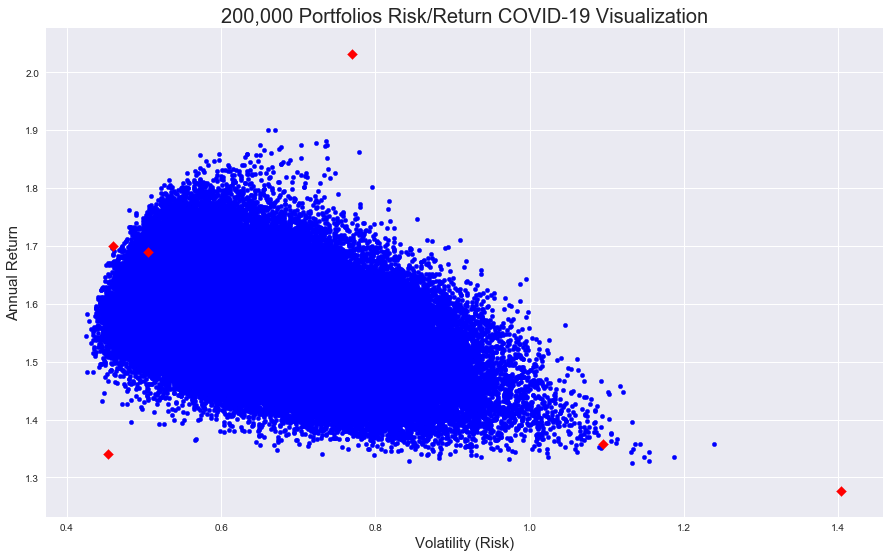

In [19]:
plt.figure(figsize = (15, 9))
plt.scatter(port_summary.loc[:, "Risk"], port_summary.loc[:, "Return"],s= 20, color = "blue")
plt.scatter(summary.loc[:, "Risk"], summary.loc[:, "Return"], s= 50, color = "red", marker = "D")
plt.xlabel('Volatility (Risk)', fontsize = 15)
plt.ylabel("Annual Return", fontsize = 15)
plt.title("200,000 Portfolios Risk/Return COVID-19 Visualization", fontsize = 20)
plt.show()

## Portfolio Analysis With The Sharpe Ratio

Used to help investors understand the return of an investment compared to its risk. The ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk. Volatility is a measure of the price fluctuations of an asset or portfolio.

Since the Portfolio is from March 23 2020 to May 29 2020, we're going to be using the 3 month government bond, which is at 0.12% as the Risk Free rate. https://www.bloomberg.com/markets/rates-bonds/government-bonds/us use this website to track the treasury yields.

In [20]:
risk_free_return = 0.012
risk_free_risk = 0

In [21]:
rf = [risk_free_return, risk_free_risk]
rf

[0.012, 0]

Sharpe Ratios for stocks in the portfolio:

In [22]:
summary["Sharpe"] = (summary["Return"].sub(rf[0]))/summary["Risk"]
summary

,Return,Risk,Sharpe
AAL,1.28,1.40,0.90
BAC,2.03,0.77,2.62
CSCO,1.69,0.50,3.32
DAL,1.36,1.10,1.23
KO,1.34,0.45,2.93
MSFT,1.70,0.46,3.67


Stock Sharpe Ratio Analysis: Notice that the stocks all have positive values for the sharpe ratio. This mean's we are expecting gains from these stocks. 

Portfolio Sharpe Ratios: having a porfolio sharpe ratio above 1 is ideal to have

In [23]:
port_summary["Sharpe"] = (port_summary["Return"].sub(rf[0]))/port_summary["Risk"]

In [24]:
port_summary.tail().dropna()

,Return,Risk,Sharpe
199995,1.62,0.70,2.29
199996,1.52,0.63,2.41
199997,1.63,0.68,2.38
199998,1.69,0.61,2.76
199999,1.58,0.63,2.51


In [25]:
port_summary.describe()

,Return,Risk,Sharpe
count,200000.00,200000.00,200000.00
mean,1.57,0.66,2.39
std,0.07,0.09,0.38
min,1.33,0.42,1.09
25%,1.52,0.60,2.13
50%,1.57,0.66,2.37
75%,1.61,0.72,2.64
max,1.90,1.24,3.69


out of 200,000 portfolio simulations, our maximum results lead to an 1.90% return, 1.24% risk and sharpe ratio of 3.69. The best performing portfolios usually have a Sharpe Ratios with 1 or above which is ideal to look for. In over all return of this portfolio combination is greater then risk. 

Plot 200,000 Portfolio Sharpe Ratio Performances. "vmin" comes from "25%", "vmax" comes from max sharpe ratio, and "alpha" comes from "max return" this is also a trial and error process to get the most out of the chart. data inputs comform the describe chart.

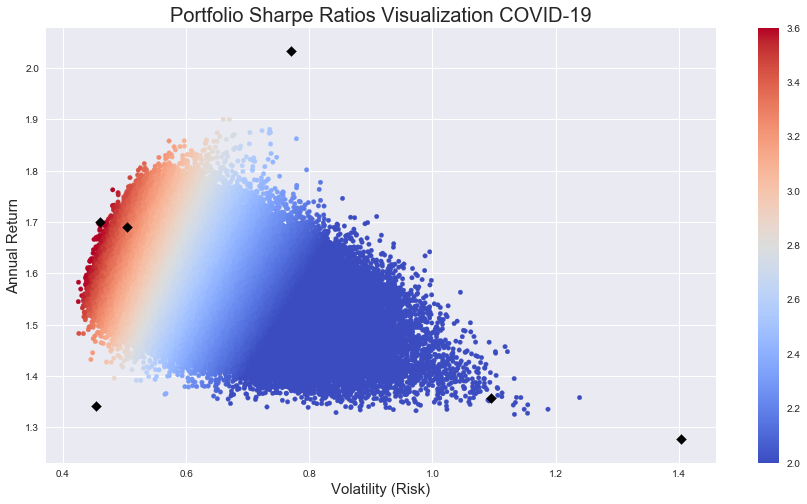

In [26]:
plt.figure(figsize = (15, 8))
plt.scatter(port_summary.loc[:, "Risk"], port_summary.loc[:, "Return"], s= 20, 
            c = port_summary.loc[:, "Sharpe"], cmap = "coolwarm", vmin = 2.00, vmax = 3.6, alpha = 1.9)
plt.colorbar()
plt.scatter(summary.loc[:, "Risk"], summary.loc[:, "Return"],s= 50, marker = "D", c = "black")
plt.xlabel("Volatility (Risk)", fontsize = 15)
plt.ylabel("Annual Return", fontsize = 15)
plt.title("Portfolio Sharpe Ratios Visualization COVID-19", fontsize = 20)
plt.show()

## The Optimal Portfolio - "Max Sharpe Ratio Portfolio"

In [27]:
msrp = port_summary.Sharpe.idxmax()
msrp

13034

Results of the Max Sharpe Ratio Portfolio:

In [28]:
port_summary.loc[msrp]

Return   1.58
Risk     0.43
Sharpe   3.69
Name: 13034, dtype: float64

The "optimal weights" of the portfolio:

In [29]:
msrp_w = weights[msrp, :]
msrp_w

array([0.00399721, 0.00244394, 0.06195964, 0.00777264, 0.31493328,
       0.60889329])

out of 200,000 portfolio, "The Best Portfolio" consist of the following combinations:

In [31]:
pd.Series(index = Robin_Stocks.columns, data = msrp_w)

AAL    0.00
BAC    0.00
CSCO   0.06
DAL    0.01
KO     0.31
MSFT   0.61
dtype: float64

Optimization Analysis: Notice the optimal portfolio, has 0% AAL and 0% BAC allocations.

###  Finding the "absolute optimal portfolio" with scipy, an optimization algorithm

In [32]:
import pandas as pd
import numpy as np
import scipy.optimize as sco
pd.options.display.float_format = '{:.4f}'.format
np.set_printoptions(suppress = True)

Risk Free Rate:

In [33]:
rf = 0.012

Annualized portfolio return (based on weights):

In [34]:
def port_ret(weights):
    return ret.dot(weights.T).mean() * 252

Annualized portfolio volatility (based on weights):

In [35]:
def port_vol(weights):
    return ret.dot(weights.T).std() * np.sqrt(252)

In [36]:
def min_func_sharpe(weights): 
     return (rf - port_ret(weights)) / port_vol(weights) #sharpe ratio * (-1)

Number of assets in the portfolio:

In [37]:
noa = len(ret.columns)
noa

6

In order to find the absolute optimal portfolio we must set all stocks to equal weights:

In [38]:
eweigths = np.full(noa, 1/noa)
eweigths

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])

In [39]:
cons = ({"type": "eq", "fun": lambda x: np.sum(x) - 1})

In [40]:
bnds =  tuple((0,1) for x in range(noa))

Optimization based on function to be minimized, starting with equal weights and based on respective bounds and constraints:

In [41]:
opts = sco.minimize(min_func_sharpe, eweigths, method = "SLSQP", bounds = bnds, constraints= cons)

Optimizations:

In [42]:
opts

     fun: -3.7389768542153674
     jac: array([ 1.85590276, -0.02727127, -0.02697918,  1.00751171, -0.02681509,
       -0.02694112])
 message: 'Optimization terminated successfully.'
    nfev: 64
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([0.        , 0.07606803, 0.01259869, 0.        , 0.13510914,
       0.77622415])

In [43]:
optimal_weights = opts["x"]
optimal_weights

array([0.        , 0.07606803, 0.01259869, 0.        , 0.13510914,
       0.77622415])

The "Absolute Optimal Weight" (%) provide the following alloctions in each stock:

In [45]:
optimal_weights = pd.Series(index = Robin_Stocks.columns, data = optimal_weights)
optimal_weights

AAL    0.0000
BAC    0.0761
CSCO   0.0126
DAL    0.0000
KO     0.1351
MSFT   0.7762
dtype: float64

Absolute Optimization Analysis: Notice now after using an optimization algorithm to achive the "absolute best portfolio" out of the 200,000 combinations the result include. 0% AAL and 0% DAL, compared to the previous optimization which had 0% AAL and 0% BAC. The "absolute Optimization" is more logical due to the fact that the airline industry has been hit the hardest due to COVID-19.

MSRP = Max Sharpe Ratio Portfolio:

In [46]:
ret['MSRP'] = ret.dot(optimal_weights)

Dailty Returns including MSRP:

In [47]:
ret.tail()

,AAL,BAC,CSCO,DAL,KO,MSFT,MSRP
Date,,,,,,,
2020-05-21,0.0020,-0.0004,-0.0176,0.0194,-0.0157,-0.0120,-0.0117
2020-05-22,-0.0192,-0.0105,0.0058,-0.0203,-0.0031,0.0004,-0.0008
2020-05-26,0.1485,0.0715,-0.0013,0.1305,0.0235,-0.0106,0.0004
2020-05-27,0.0754,0.0700,0.0250,0.0261,0.0139,0.0013,0.0085
2020-05-28,-0.0835,-0.0431,-0.0078,-0.0251,0.0077,-0.0023,-0.0041


Risk and Return including the Max Sharpe Ratio Portfolio:

In [48]:
summary = ann_risk_return(ret)
summary

,Return,Risk
AAL,1.2770,1.4038
BAC,2.0325,0.7701
CSCO,1.6903,0.5048
DAL,1.3574,1.0956
KO,1.3411,0.4532
MSFT,1.7002,0.4602
MSRP,1.6769,0.4453


Notice that the MSRP has a return of 1.68 with a risk of 0.44. which is far exceeding the the potential risk.

## Including the Market Portfolio

A market portfolio is a theoretical bundle of investments that includes every type of asset available in the investment universe, with each asset weighted in proportion to its total presence in the market. The expected return of a market portfolio is identical to the expected return of the market as a whole.

A market portfolio, by nature of being completely diversified, is subject only to systematic risk, or risk that affects the market as a whole, and not to unsystematic risk, which is the risk inherent to a particular asset class. In this case study we will be using the S&P 500 Index as the market portfolio.

In [49]:
Robin_Stocks = pd.read_csv("Robin_Stocks.csv", header = [0,1], index_col = [0], parse_dates = [0])["Adj Close"]
SP500_Index =  pd.read_csv("SP500.csv", index_col = "Date", parse_dates = ["Date"])["Adj Close"].to_frame()

In [50]:
Robin_Stocks = Robin_Stocks.loc["2020-3-23":"2020-5-29"]
SP500_Index = SP500_Index.loc["2020-3-23":"2020-5-29"]

Closing Prices of the S&P 500 index:

In [51]:
SP500_Index.tail().dropna()

,Adj Close
Date,
2020-05-21,2948.5100
2020-05-22,2955.4500
2020-05-26,2991.7700
2020-05-27,3036.1299
2020-05-28,3029.7300


In [52]:
Robin_Stocks["MP"] = SP500_Index["Adj Close"]

Closing Prices of the stocks including the Market Portfolio:

In [53]:
Robin_Stocks.tail().dropna()

,AAL,BAC,CSCO,DAL,KO,MSFT,MP
Date,,,,,,,
2020-05-21,9.8900,22.9000,44.6400,23.1600,45.1700,183.4300,2948.5100
2020-05-22,9.7000,22.6600,44.9000,22.6900,45.0300,183.5100,2955.4500
2020-05-26,11.1400,24.2800,44.8400,25.6500,46.0900,181.5700,2991.7700
2020-05-27,11.9800,25.9800,45.9600,26.3200,46.7300,181.8100,3036.1299
2020-05-28,10.9800,24.8600,45.6000,25.6600,47.0900,181.4000,3029.7300


Daily Returns Including the Market Portfolio:

In [55]:
ret = Robin_Stocks.pct_change().dropna() 
# ret, when inputting "ret" it'll bring up a list of the daily returns

In [56]:
def ann_risk_return(returns_df):
    summary = returns_df.agg(["mean", "std"]).T
    summary.columns = ["Return", "Risk"]
    summary.Return = summary.Return*252
    summary.Risk = summary.Risk * np.sqrt(252)
    return summary

Risk and Return of the stocks including the Market Portfolio due to COVID-19:

In [57]:
summary = ann_risk_return(ret)
summary

,Return,Risk
AAL,1.2770,1.4038
BAC,2.0325,0.7701
CSCO,1.6903,0.5048
DAL,1.3574,1.0956
KO,1.3411,0.4532
MSFT,1.7002,0.4602
MP,1.7507,0.4199


Risk/Return Including the Market Portfolio:

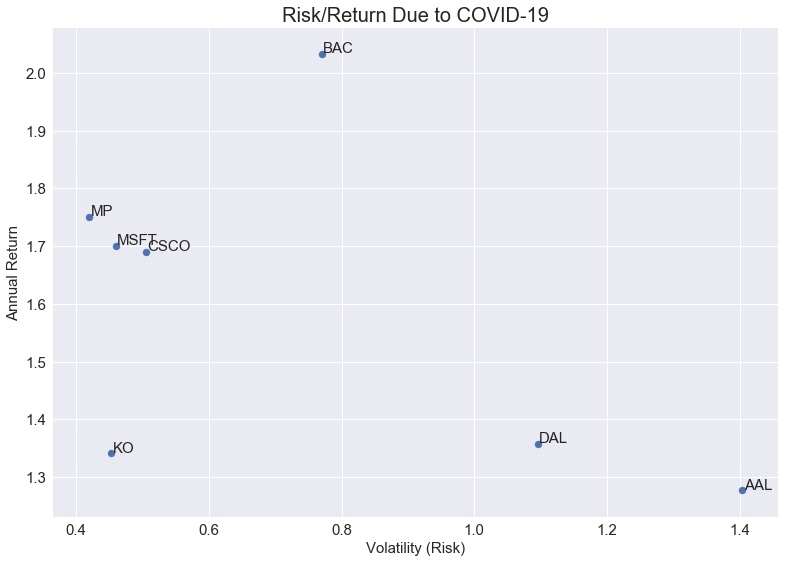

In [58]:
summary.plot(kind = "scatter", x = "Risk", y = "Return", figsize = (13,9), s = 50, fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "Risk"]+0.002, summary.loc[i, "Return"]+0.002), size = 15)
plt.xlabel("Volatility (Risk)", fontsize = 15)
plt.ylabel("Annual Return", fontsize = 15)
plt.title("Risk/Return Due to COVID-19", fontsize = 20)
plt.show()

Calculating the Sharpe Ratio including the Market Portfolio (MP):

In [59]:
risk_free_return = 0.012
risk_free_risk = 0

In [60]:
rf = [risk_free_return, risk_free_risk]
rf

[0.012, 0]

Sharpe Ratio of stocks and the Market Portfolio:

In [61]:
summary["Sharpe"] = (summary["Return"].sub(rf[0]))/summary["Risk"]
summary

,Return,Risk,Sharpe
AAL,1.2770,1.4038,0.9011
BAC,2.0325,0.7701,2.6236
CSCO,1.6903,0.5048,3.3245
DAL,1.3574,1.0956,1.2280
KO,1.3411,0.4532,2.9327
MSFT,1.7002,0.4602,3.6688
MP,1.7507,0.4199,4.1409


Notice that the Market Porfolo has a positive sharpe ratio, this generally moves we're expecting positive returns.

## Systematic and Unsystematic Risk  Including the Market Portfolio

Systematic risk refers to the risk inherent to the entire market or market segment. Systematic risk, also known as “undiversifiable risk,” “volatility” or “market risk,” affects the overall market, not just a particular stock or industry. This type of risk is both unpredictable and impossible to completely avoid. It cannot be mitigated through diversification, only through hedging or by using the correct asset allocation strategy.

Unsystematic risk is unique to a specific company or industry. Also known as “nonsystematic risk,” "specific risk," "diversifiable risk" or "residual risk," in the context of an investment portfolio, unsystematic risk can be reduced through diversification.

In [62]:
summary["TotalRisk_var"] = np.power(summary.Risk, 2)
summary

,Return,Risk,Sharpe,TotalRisk_var
AAL,1.2770,1.4038,0.9011,1.9707
BAC,2.0325,0.7701,2.6236,0.5931
CSCO,1.6903,0.5048,3.3245,0.2549
DAL,1.3574,1.0956,1.2280,1.2003
KO,1.3411,0.4532,2.9327,0.2054
MSFT,1.7002,0.4602,3.6688,0.2117
MP,1.7507,0.4199,4.1409,0.1763


In statistics, covariance is a metric used to measure how one random variable moves in relation to another random variable. In investment, covariance of returns measures how the rate of return on one asset varies in relation to the rate of return on other assets or a portfolio.

In [63]:
COV = ret.cov()*252
# COV, if we add "COV" it'll create a long chart

In [64]:
summary["SystRisk_var"] = COV.iloc[:, -1]

In [65]:
summary["UnsystRisk_var"] = summary["TotalRisk_var"].sub(summary["SystRisk_var"])
summary

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var
AAL,1.2770,1.4038,0.9011,1.9707,0.3428,1.6279
BAC,2.0325,0.7701,2.6236,0.5931,0.2748,0.3182
CSCO,1.6903,0.5048,3.3245,0.2549,0.1913,0.0635
DAL,1.3574,1.0956,1.2280,1.2003,0.2772,0.9230
KO,1.3411,0.4532,2.9327,0.2054,0.1620,0.0433
MSFT,1.7002,0.4602,3.6688,0.2117,0.1700,0.0417
MP,1.7507,0.4199,4.1409,0.1763,0.1763,0.0000


### Systematic and Unsystematic risk of stocks including the Market Portfolio (MP) (S&P500 Index):

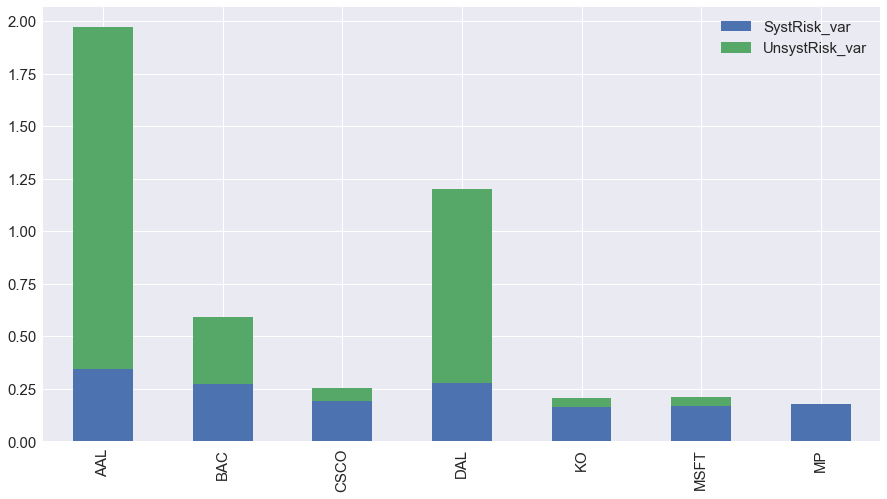

In [66]:
summary.iloc[:, 4:].plot(kind = "bar", stacked = True, figsize= (15, 8), fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In general we want a balance between systematic and unsystematic risk. Systematic risk has to do with the stock getting affected by the overall market, and the stocks in this portfolio that gets affected by the market condidtions the most due to COVID-19 are CSCO, KO, and MSFT. the stocks that have the highest Unsystematic risk also company specific risk are DAL and AAL. BAC seems to have a decent balance between systematic and unsystematic risk. 

Determining the beta of the stocks in the portfolio compared to the Market Portfolio (S&P 500 Index):

Beta is a measure of the volatility (Risk), or systematic risk, of a security or portfolio, in comparison to the market as a whole. 

In [67]:
summary["beta"] = summary.SystRisk_var / summary.loc["MP", "SystRisk_var"]
summary

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var,beta
AAL,1.2770,1.4038,0.9011,1.9707,0.3428,1.6279,1.9444
BAC,2.0325,0.7701,2.6236,0.5931,0.2748,0.3182,1.5589
CSCO,1.6903,0.5048,3.3245,0.2549,0.1913,0.0635,1.0853
DAL,1.3574,1.0956,1.2280,1.2003,0.2772,0.9230,1.5726
KO,1.3411,0.4532,2.9327,0.2054,0.1620,0.0433,0.9191
MSFT,1.7002,0.4602,3.6688,0.2117,0.1700,0.0417,0.9645
MP,1.7507,0.4199,4.1409,0.1763,0.1763,0.0000,1.0000


Stocks with the highest beta include DAL, BAC and AAL. since their betas are above 1, this means that they get largely affected by market condidtions in a postive and a negative way. If the S&P 500 were to drop around 5%, these stocks would be likely to drop towards 8 to 10% in a day and if the S&P500 would of rallyed 5% then those stocks would gained 8 to 10% in a day. In other words high beta stock tend to have more risk.  

## Determining The Security Market Line

The security market line is an investment evaluation tool derived from the CAPM—a model that describes risk-return relationship for securities—and is based on the assumption that investors need to be compensated for both the time value of money (TVM) and the corresponding level of risk associated with any investment, referred to as the risk premium.

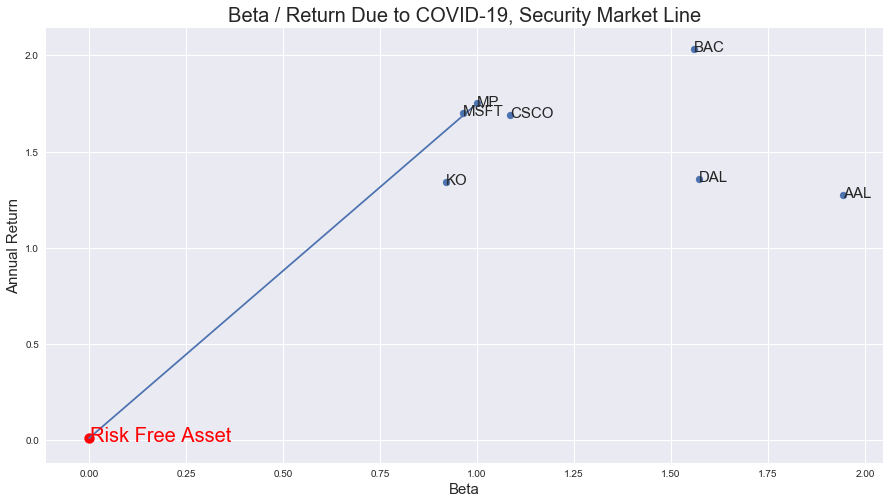

In [68]:
plt.figure(figsize = (15, 8))
plt.scatter(summary.beta, summary.Return)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "beta"]+0.00, summary.loc[i, "Return"]-0.015), size = 15)
plt.plot([rf[1], summary.loc["MP", "beta"]], [rf[0], summary.loc["MP", "Return"]])
plt.scatter(rf[1], rf[0], s = 100, marker = "o", c = "red")
plt.annotate("Risk Free Asset", xy = (rf[1] + 0.002, rf[0] - 0.02), size = 20, color = "Red")
plt.xlabel("Beta", fontsize = 15)
plt.ylabel("Annual Return", fontsize = 15)
plt.title("Beta / Return Due to COVID-19, Security Market Line", fontsize = 20)
plt.show()

Security Market Line Analysis: since CSCO, KO, BACm DALm AAL all fall below the SML this is an indictor that they are  underperforming the market. while MSFT is borderline outperforming the Market.

### Including the Capital Asset Pricing Model and Alpha of the stocks with the Market Portfolio

The Capital Asset Pricing Model (CAPM) describes the relationship between systematic risk and expected return for assets, particularly stocks. CAPM is widely used throughout finance for pricing risky securities and generating expected returns for assets given the risk of those assets and cost of capital.

"Alpha" (the Greek letter α) is a term used in investing to describe a strategy's ability to beat the market, or it's "edge." Alpha is thus also often referred to as “excess return” or “abnormal rate of return,” which refers to the idea that markets are efficient, and so there is no way to systematically earn returns that exceed the broad market as a whole. Alpha is often used in conjunction with beta (the Greek letter β) , which measures the broad market's overall volatility or risk, known as systematic market risk

In [69]:
summary["capm_ret"] = rf[0] + (summary.loc["MP", "Return"] - rf[0]) * summary.beta

In [70]:
summary["alpha"] = summary.Return - summary.capm_ret
summary

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var,beta,capm_ret,alpha
AAL,1.2770,1.4038,0.9011,1.9707,0.3428,1.6279,1.9444,3.3927,-2.1157
BAC,2.0325,0.7701,2.6236,0.5931,0.2748,0.3182,1.5589,2.7224,-0.6899
CSCO,1.6903,0.5048,3.3245,0.2549,0.1913,0.0635,1.0853,1.8990,-0.2086
DAL,1.3574,1.0956,1.2280,1.2003,0.2772,0.9230,1.5726,2.7463,-1.3889
KO,1.3411,0.4532,2.9327,0.2054,0.1620,0.0433,0.9191,1.6100,-0.2690
MSFT,1.7002,0.4602,3.6688,0.2117,0.1700,0.0417,0.9645,1.6890,0.0113
MP,1.7507,0.4199,4.1409,0.1763,0.1763,0.0000,1.0000,1.7507,0.0000


CAPM Analysis: Since we know that the CAPM is used for determining expected returns on stocks, we can notice that each stock is expected to reach positve returns, with AAL, BAC and DAL being the the highest expected positive returns in this portfolio since they have the highest beta's. This could of course change do to market condidtions.  

Alpha Analysis: Understanding that Alpha is used to determine whether or not a stock would beat the overall market. We can notice that AALm BACm CSCO, DAL, and KO are the only stock in the Portfolio that have a chance of not beating the over all market which makes since, because they falls below the Security Market Line.